In [33]:
#https://www.pyimagesearch.com/2017/02/13/recognizing-digits-with-opencv-and-python/
#list, tuple, dictionary

#a['숫자나 문자 등'] = 3
#Key, value
#a[1] = 4

In [34]:
lst = [1, 2, 3]

In [35]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
# define the dictionary of digit segments so we can identify
# each digit on the thermostat

DIGITS_LOOKUP = {
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 0, 1, 0, 0, 1, 0): 1,
    (1, 0, 1, 1, 1, 1, 0): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 0, 1, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9
}

#DIGITS_LOOKUP is a dictionary

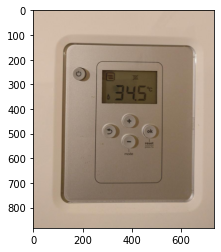

In [36]:
image = cv2.imread("example.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [37]:
# load the example image

# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

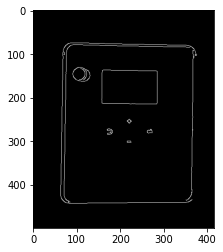

In [38]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [39]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [40]:
cnts

([array([[[216, 300]],
  
         [[216, 303]],
  
         [[225, 303]],
  
         [[225, 302]],
  
         [[224, 301]],
  
         [[224, 300]]], dtype=int32),
  array([[[269, 273]],
  
         [[269, 274]],
  
         [[267, 276]],
  
         [[266, 275]],
  
         [[264, 275]],
  
         [[262, 277]],
  
         [[262, 280]],
  
         [[263, 281]],
  
         [[264, 281]],
  
         [[265, 282]],
  
         [[266, 282]],
  
         [[267, 281]],
  
         [[274, 281]],
  
         [[267, 281]],
  
         [[266, 282]],
  
         [[265, 282]],
  
         [[262, 279]],
  
         [[262, 278]],
  
         [[265, 275]],
  
         [[266, 275]],
  
         [[267, 276]],
  
         [[268, 276]],
  
         [[269, 275]],
  
         [[270, 276]],
  
         [[269, 275]],
  
         [[269, 274]],
  
         [[270, 273]],
  
         [[272, 275]],
  
         [[272, 276]],
  
         [[273, 277]],
  
         [[273, 278]],
  
         [[274, 279]],
  


In [41]:
cnts = imutils.grab_contours(cnts)

In [42]:
cnts

[array([[[216, 300]],
 
        [[216, 303]],
 
        [[225, 303]],
 
        [[225, 302]],
 
        [[224, 301]],
 
        [[224, 300]]], dtype=int32),
 array([[[269, 273]],
 
        [[269, 274]],
 
        [[267, 276]],
 
        [[266, 275]],
 
        [[264, 275]],
 
        [[262, 277]],
 
        [[262, 280]],
 
        [[263, 281]],
 
        [[264, 281]],
 
        [[265, 282]],
 
        [[266, 282]],
 
        [[267, 281]],
 
        [[274, 281]],
 
        [[267, 281]],
 
        [[266, 282]],
 
        [[265, 282]],
 
        [[262, 279]],
 
        [[262, 278]],
 
        [[265, 275]],
 
        [[266, 275]],
 
        [[267, 276]],
 
        [[268, 276]],
 
        [[269, 275]],
 
        [[270, 276]],
 
        [[269, 275]],
 
        [[269, 274]],
 
        [[270, 273]],
 
        [[272, 275]],
 
        [[272, 276]],
 
        [[273, 277]],
 
        [[273, 278]],
 
        [[274, 279]],
 
        [[273, 278]],
 
        [[273, 276]],
 
        [[272, 275]],
 
   

In [43]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

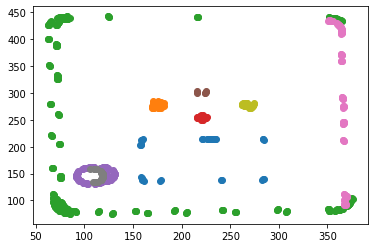

In [44]:
for c in cnts:
    x = [elem[0][0] for elem in c]
    y = [elem[0][1] for elem in c]
    plt.scatter(x, y)

[[[159 138]]

 [[158 213]]

 [[284 215]]

 [[285 140]]]


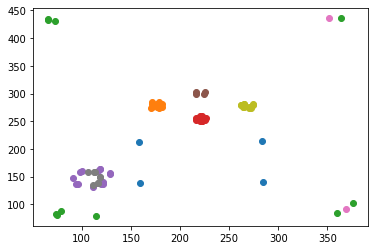

In [45]:
displayCnt = None
for c in cnts:
    # approximate the contour
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    # if the contour has four vertices, then we have found
    # the thermostat display
    x = [elem[0][0] for elem in approx]
    y = [elem[0][1] for elem in approx]
    plt.scatter(x, y)
    if len(approx) == 4:
        if displayCnt is None:
            displayCnt = approx
            print(approx)
        #breakb

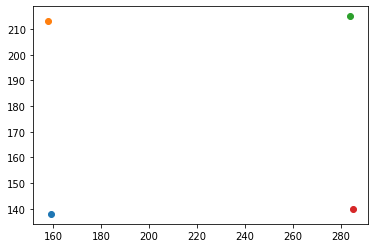

In [46]:
for elem in displayCnt:
    plt.scatter(elem[0][0], elem[0][1])

In [47]:
print(displayCnt)

print(np.shape(displayCnt))
print(displayCnt.shape)

print(displayCnt)
print(displayCnt.reshape(4, 2))
print(displayCnt.reshape(2, 4))

[[[159 138]]

 [[158 213]]

 [[284 215]]

 [[285 140]]]
(4, 1, 2)
(4, 1, 2)
[[[159 138]]

 [[158 213]]

 [[284 215]]

 [[285 140]]]
[[159 138]
 [158 213]
 [284 215]
 [285 140]]
[[159 138 158 213]
 [284 215 285 140]]


In [48]:
warped = four_point_transform(gray, displayCnt.reshape(4, 2))
output = four_point_transform(image, displayCnt.reshape(4, 2))

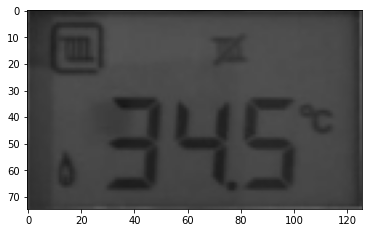

In [49]:
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))

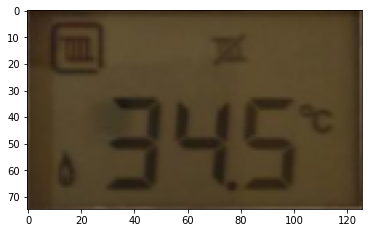

In [50]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

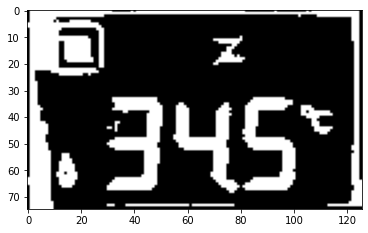

In [51]:
thresh = cv2.threshold(warped, 0, 255,
         cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

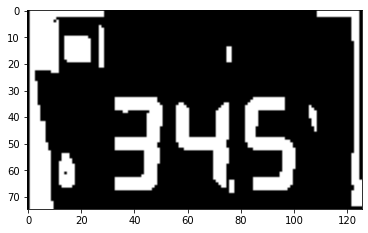

In [52]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

In [86]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
digitCnts = []
# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    plt.scatter([elem[0][0] in c],[elem[0][1] in c])
    
    (x, y, w, h) = cv2.boundingRect(c)
    xx = [x, x, x + w, x + w]
    yy = [y, y + h, y, y + h]
    plt.plot(xx, yy)
    # if the contour is sufficiently large, it must be a digit
    if w >= 15 and (h >= 30 and h <= 40):
        digitCnts.append(c)

TypeError: 'int' object is not subscriptable

In [54]:
print(cv2.boundingRect(c))

(1, 0, 28, 75)


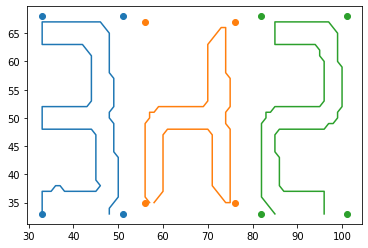

In [84]:
for c in digitCnts:
    (x, y, w, h) = cv2.boundingRect(c)
    boundingX = [x, x, x + w, x + w]
    boundingY = [y, y + h, y, y + h]
    plt.scatter(boundingX, boundingY)
    
        
    contourX = [elem[0][0] for elem in c]
    contourY = [elem[0][1] for elem in c]
    plt.plot(contourX, contourY)
    

In [60]:
(c, h, a, n, g, h, a) = [1, 2, 3, 4, 5, 6, 7]

In [61]:
print(c)

1


In [56]:
digitCnts = contours.sort_contours(digitCnts,method="left-to-right")[0]
digits = []

for c in digitCnts:
    # extract the digit ROI
    (x, y, w, h) = cv2.boundingRect(c)
    roi = thresh[y:y + h, x:x + w]
    # compute the width and height of each of the 7 segments
    # we are going to examine
    (dW, dH) = (int(w * 0.25), int(h * 0.15))
    dHC = int(h * 0.05)
    # define the set of 7 segments

    segments = [
        ((0, 0), (w, dH)),	# top
        ((0, 0), (dW, h // 2)),	# top-left
        ((w - dW, 0), (w, h // 2)),	# top-right
        ((0, (h // 2) - dHC) , (w, (h // 2) + dHC)), # center
        ((0, h // 2), (dW, h)),	# bottom-left
        ((w - dW, h // 2), (w, h)),	# bottom-right
        ((0, h - dH), (w, h))	# bottom
    ]

    
    on = [0] * len(segments)
 #   on = new Vector(0)
# [0,0,0,0,0,0,0]
    
    for (i, ((xA, yA), (xB, yB))) in enumerate(segments):
        # extract the segment ROI, count the total number of
        # thresholded pixels in the segment, and then compute
        # the area of the segment
        segROI = roi[yA:yB, xA:xB]
        
        total = cv2.countNonZero(segROI)
        area = (xB - xA) * (yB - yA)
        
        # if the total number of non-zero pixels is greater than
        # 50% of the area, mark the segment as "on"
        if total / float(area) > 0.5:
            on[i]= 1
        
            # lookup the digit and draw it on the image
    digit = DIGITS_LOOKUP[tuple(on)]
    digits.append(digit)

In [57]:
digits

[3, 4, 5]

In [64]:
roi

array([[  0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0

In [58]:
#TUPLE from W3schools.com

#Ordered
#When we say that tuples are ordered, it means that the items have a defined order, and that order will not change.

#Unchangeable
#Tuples are unchangeable, meaning that we cannot change, add or remove items after the tuple has been created.
#immutable

#Allow Duplicates
#Since tuple are indexed, tuples can have items with the same value:

#set
#{3, 5, 5, 5}

#function: x = x + 5
#a = 3
#f(a)
#a = 8
#mutable

#function: return x + 5
#a = 3
#b = f(a)
#a = 3, b = 8
#immutable

In [68]:
for x in [2, 3, 4]:
    print(x+1)
    
for (index, elem) in enumerate([2, 3, 4]):
    #(index, selected element)
    print(index, elem)
    
(x, y, w) = [1, 2, 3]
print(x, y, w)

3
4
5
0 2
1 3
2 4
1 2 3


In [79]:
x = np.linspace(0,10, 100)

In [80]:
y = np.sin(x)

In [72]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [77]:
y = np.sin(x)

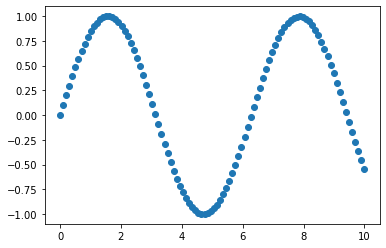

In [81]:
plt.scatter(x, y)

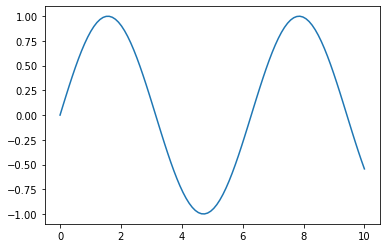

In [83]:
plt.plot(x, y)